<center>

# Web Intelligence

## Who will win the Tennis Australian Open 2020?

### Riccardo Spolaor (864877)

</center>

## Index

1. [Scaricare il dataset e rendere i dati facilmente accessibili](#s_1)
1. Section 2

<a id="s_1"></a>

## Scaricare il dataset e rendere i dati facilmente accessibili

Il primo step consiste nello scaricare il dataset dal web ed importarlo in un oggetto DataFrame della libreria pandas.




In [14]:
### IDEE ###

# Il modello deve essere: dati i giocatori e gli attributi dei match restituire 0 se vince Giocatore A e 1 se vince Giocatore B
# Dovrò creare una colonna winner e in ogni riga sdoppiarla e shufflare Giocatore A e B e dare il valore opposto a winner

# Per giocatori provo un LabelEncoding di sicuro sennò si allarga troppo il dataset
# Posso  testare la differenza con un label encoding fatto da me che li ordina in base alle vittorie - sconfitte e vedere se va meglio

# Per il commento ha senso usare one-hot-encoding che tanto ha solo 6 dati
# dataframe['Comment'].unique()

# Per la location ha senso usare un label encoding, perché non c'è relazione di grandezza tra i dati, ma usare one-hot-encoding
# allargherebbe troppo il dataset
# len(dataframe['Location'].unique())

# Court e Surface possono essere trasformate con l'one-hot-encoding perché sono delle categoriali senza relazioni tra loro
# Posso vedere se ha senso droppare tutte le court Indoor e le surface visto che i campionati AUS sono sempre outdoor

# Per i round posso provare ad unire label encoding e one-hot-encoding
# 1st - 2nd - 3rd - 4th - quarter - semi - final sono in ordine crescente di importanza. Round Robin è una roba a parte.
# Creo colonna Round Robin categoriale di 0 e 1 e nella colonna round do 0 a round robin e numeri crescenti.
# Penso non abbia senso droppare le colonne con round robin, perché comunque le partite hanno lo stesso un loro significato
# dataframe['Round'].unique()

# I Tournament possono essere manualmente label encoded in base al prestigio

# Date posso trasformarla in tre colonne GG MM AAAA

# HA SENSO ATTRIBUIRE a WRank e LRank nulli LA MEDIA DEI RANK DEL GIOCATORE E SE QUESTA NON ESISTE DROPPARE LE RIGHE?
# WPoints può essere inferito stastiticamente da WRank?

### Roba in più ###
# Aggiungere due feature -> media risultato partite A vs giocatori simili a B e B vs giocatori simili a A decise con unsupervised learning

array(['1st Round', '2nd Round', 'Quarterfinals', 'Semifinals',
       'The Final', '3rd Round', '4th Round', 'Round Robin'], dtype=object)

In [229]:
# Costruzione del Dataframe

# Ignoro completamente i dati del 2000 in quanto non contengono le informazioni dei bookmaker

# Aggiungo colonna 'Year' che mi servirà per fare i confronti tra giocatori simili negli anni 

import urllib.request, zipfile, pandas

def get_file(url):
    filehandle, _ = urllib.request.urlretrieve(url)
    zip_file_obj = zipfile.ZipFile(filehandle, 'r')
    file = zip_file_obj.open(zip_file_obj.namelist()[0])
    return file

dataframe = pandas.DataFrame()

for date in range(2001,2019+1):
    file = get_file('http://tennis-data.co.uk/' + str(date) + '/' + str(date) + '.zip')
    dataframe = dataframe.append(pandas.read_excel(file).assign(Year = date), sort = False, ignore_index = True)


dataframe.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3,Clement A.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3,Goldstein P.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3,Haas T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3,Henman T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,AAPT Championships,2001-01-01,International,Outdoor,Hard,1st Round,3,Hewitt L.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
dataframe.columns

array([ 2.,  0.,  1.,  3., nan])

In [230]:
# Vedo similarità dei giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)

players2019 = set(dataframe[dataframe['Year'] == 2019]['Winner'].append(dataframe[dataframe['Year'] == 2019]['Loser']).unique())
print(type(players2019))
for date in range(2001,2019) :
    players = set(dataframe[dataframe['Year'] == date]['Winner'].append(dataframe[dataframe['Year'] == date]['Loser']).unique())
    print ('Jaccard ', date, ': ', len(players2019 & players) / len( players2019 | players))
    
# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo
# Prendo

<class 'set'>
Jaccard  2001 :  0.011363636363636364
Jaccard  2002 :  0.01669449081803005
Jaccard  2003 :  0.026604068857589983
Jaccard  2004 :  0.035541195476575124
Jaccard  2005 :  0.048414023372287146
Jaccard  2006 :  0.06645056726094004
Jaccard  2007 :  0.10229276895943562
Jaccard  2008 :  0.12147887323943662
Jaccard  2009 :  0.11584327086882454
Jaccard  2010 :  0.1724137931034483
Jaccard  2011 :  0.1854043392504931
Jaccard  2012 :  0.21095334685598377
Jaccard  2013 :  0.267515923566879
Jaccard  2014 :  0.3167420814479638
Jaccard  2015 :  0.35294117647058826
Jaccard  2016 :  0.4066193853427896
Jaccard  2017 :  0.4838709677419355
Jaccard  2018 :  0.6394366197183099


In [231]:
# Droppo le righe con l'anno fino al 2010 escluso, per lavorare con un dataset più ridotto e sensato

dataframe.drop(dataframe[dataframe['Year'].isin(range(2001,2010))].index, axis =0, inplace = True)

dataframe = dataframe.reset_index(drop = True)

dataframe.drop(['Year'], axis=1, inplace=True)

dataframe.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [232]:
import numbers
import numpy as np
# Let's clean the data by firstly checking how the values have been classified
dataframe.info()
print()
# Let's check which are the values that are not numbers in attributes where we expect number
# And we replace this values with NaN
def checkValues(attribute_names):
    for a in attribute_names:
        print('"'+a+'": ', 'Wrong Values: ' , set([x for x in dataframe[a] if not isinstance(x, numbers.Number)]))
    
checkValues(['LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'EXW'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26328 entries, 0 to 26327
Data columns (total 54 columns):
ATP           26328 non-null int64
Location      26328 non-null object
Tournament    26328 non-null object
Date          26328 non-null datetime64[ns]
Series        26328 non-null object
Court         26328 non-null object
Surface       26328 non-null object
Round         26328 non-null object
Best of       26328 non-null int64
Winner        26328 non-null object
Loser         26328 non-null object
WRank         26317 non-null float64
LRank         26276 non-null object
W1            26161 non-null float64
L1            26163 non-null float64
W2            25908 non-null object
L2            25908 non-null object
W3            12377 non-null object
L3            12377 non-null object
W4            2444 non-null float64
L4            2444 non-null float64
W5            917 non-null float64
L5            917 non-null float64
Wsets         26160 non-null float64
Lsets         26158

In [233]:
#def reassignNans(attribute_names):
#    for a in attribute_names:
#        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
#        dataframe.loc[dataframe[a].isin(wrong_values), a] = np.nan
#        dataframe[a] = dataframe[a].astype(float)
        
import re

def correctTypos(attribute_names):
    for a in attribute_names:
        wrong_values = set([x for x in dataframe[a] if not isinstance(x, numbers.Number)])
        indexes = dataframe[dataframe[a].isin(wrong_values)].index.tolist()
        dataframe.iloc[indexes[0]]
        for i in indexes:
            dataframe.iloc[i,dataframe.columns.get_loc(a)] = float(re.sub("[^0-9^.]", "", str(dataframe.iloc[i][a])))            
        dataframe[a] = dataframe[a].astype(float)


#print('WRank, LRank, W2, L2, W3 and L3 have strings to represent NaN values.')
#print('We can set these strings to NaN and reassign the value of those attributes to float:')

#reassignNans(['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3'])

dataframe[['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets']] = dataframe[['WRank', 'LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets']].astype(float)

print('EXW has a typo.')
print('We can correct these typos and reassign the value of those attributes to float:')

correctTypos(['EXW'])

checkValues(['LRank', 'W2', 'L2', 'W3', 'L3', 'Lsets', 'EXW'])

dataframe.info()

EXW has a typo.
We can correct these typos and reassign the value of those attributes to float:
"LRank":  Wrong Values:  set()
"W2":  Wrong Values:  set()
"L2":  Wrong Values:  set()
"W3":  Wrong Values:  set()
"L3":  Wrong Values:  set()
"Lsets":  Wrong Values:  set()
"EXW":  Wrong Values:  set()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26328 entries, 0 to 26327
Data columns (total 54 columns):
ATP           26328 non-null int64
Location      26328 non-null object
Tournament    26328 non-null object
Date          26328 non-null datetime64[ns]
Series        26328 non-null object
Court         26328 non-null object
Surface       26328 non-null object
Round         26328 non-null object
Best of       26328 non-null int64
Winner        26328 non-null object
Loser         26328 non-null object
WRank         26317 non-null float64
LRank         26276 non-null float64
W1            26161 non-null float64
L1            26163 non-null float64
W2            25908 non-null float64
L2   

In [234]:
# Let's check how many missing values does each attribute have
def printNan():
    dictionary = {}
    for c in dataframe.columns:
        nan_sum = sum(dataframe[c].isna())
        if (nan_sum!=0): dictionary[c] = nan_sum
    shape = dataframe.shape[0]
    for key, value in dictionary.items():
        print(key, ': ', value, '/', shape)
        
def printRowsWithoutRanking():
    noBets = 0
    odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW', 'AvgW']
    odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL', 'AvgL']
    for i,r in dataframe.iterrows():
        if r[odds_W].isna().all() or r[odds_L].isna().all(): noBets += 1
    print('Rows without winner or loser bettings:', noBets)
    
printNan()

#printRowsWithoutRanking()

WRank :  11 / 26328
LRank :  52 / 26328
W1 :  167 / 26328
L1 :  165 / 26328
W2 :  420 / 26328
L2 :  420 / 26328
W3 :  13951 / 26328
L3 :  13951 / 26328
W4 :  23884 / 26328
L4 :  23884 / 26328
W5 :  25411 / 26328
L5 :  25411 / 26328
Wsets :  168 / 26328
Lsets :  170 / 26328
CBW :  26328 / 26328
CBL :  26328 / 26328
GBW :  26328 / 26328
GBL :  26328 / 26328
IWW :  26328 / 26328
IWL :  26328 / 26328
SBW :  26328 / 26328
SBL :  26328 / 26328
B365W :  118 / 26328
B365L :  95 / 26328
B&WW :  26328 / 26328
B&WL :  26328 / 26328
EXW :  2865 / 26328
EXL :  2860 / 26328
PSW :  148 / 26328
PSL :  148 / 26328
WPts :  9 / 26328
LPts :  51 / 26328
UBW :  26328 / 26328
UBL :  26328 / 26328
LBW :  3508 / 26328
LBL :  3497 / 26328
SJW :  13407 / 26328
SJL :  13400 / 26328
MaxW :  974 / 26328
MaxL :  974 / 26328
AvgW :  974 / 26328
AvgL :  974 / 26328


In [235]:
print(dataframe.columns)
print(dataframe.shape)
odds_W = ['B365W','PSW', 'EXW', 'LBW', 'SJW', 'UBW', 'CBW', 'IWW', 'SBW', 'B&WW', 'GBW']
odds_L = ['B365L','PSL', 'EXL', 'LBL', 'SJL', 'UBL', 'CBL', 'IWL', 'SBL', 'B&WL', 'GBL']

# Droppo le righe senza nessuna bet dei bookmaker e senza MaxW o AvgW
dataframe.dropna(subset = odds_W + ['AvgW'], axis=0, inplace= True, how = 'all')
dataframe.dropna(subset = odds_L + ['AvgL'], axis=0, inplace= True, how = 'all')

print(dataframe.shape)

# Calcoliamo AvgW e AvgL, MaxW, MaxL, MinW, MinL
print(sum(dataframe['AvgW'].isna()))
print(sum(dataframe['AvgL'].isna()))

dataframe['AvgW'].fillna(dataframe[odds_W].mean(axis=1), inplace = True)

dataframe['AvgL'].fillna(dataframe[odds_L].mean(axis=1), inplace= True)


print(sum(dataframe['AvgW'].isna()))
print(sum(dataframe['AvgL'].isna()))

print(sum(dataframe['MaxW'].isna()))
print(sum(dataframe['MaxL'].isna()))

dataframe['MaxW'].fillna(dataframe[odds_W + ['AvgW']].max(axis=1), inplace = True)

dataframe['MaxL'].fillna(dataframe[odds_L + ['AvgL']].max(axis=1), inplace= True)


print(sum(dataframe['MaxW'].isna()))
print(sum(dataframe['MaxL'].isna()))

dataframe['MinW'] = dataframe[odds_W + ['AvgW']].min(axis=1)

dataframe['MinL'] = dataframe[odds_L + ['AvgL']].min(axis=1)

# Drop all individual bettings
dataframe.drop(odds_W + odds_L, axis = 1, inplace= True)

dataframe.head()

dataframe = dataframe.reset_index(drop = True)

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')
(26328, 54)
(26296, 54)
942
942
0
0
942
942
0
0


In [236]:
dataframe = dataframe.reset_index(drop = True)

printNan()

print(len(dataframe[dataframe['WRank'].isna()]))
print(len(dataframe[dataframe['LRank'].isna()]))

WRank :  11 / 26296
LRank :  52 / 26296
W1 :  166 / 26296
L1 :  164 / 26296
W2 :  419 / 26296
L2 :  419 / 26296
W3 :  13930 / 26296
L3 :  13930 / 26296
W4 :  23852 / 26296
L4 :  23852 / 26296
W5 :  25379 / 26296
L5 :  25379 / 26296
Wsets :  167 / 26296
Lsets :  169 / 26296
WPts :  9 / 26296
LPts :  51 / 26296
11
52


In [237]:
# Assegno al valore del Ranking il valore  medio dei ranking di quel giocatore, se non esiste droppo la riga

def getMeanRanking(player):
    meanW = dataframe[dataframe['Winner'] == player]['WRank'].mean(skipna = True)
    meanL = dataframe[dataframe['Loser'] == player]['LRank'].mean(skipna = True)
    mean = np.nanmean([meanW, meanL])
    return mean   

def assignPlayerRank():
    missingWRank = dataframe[dataframe['WRank'].isna()]
    missingLRank = dataframe[dataframe['LRank'].isna()]
    for i, row in missingWRank.iterrows():
        dataframe.iloc[i, dataframe.columns.get_loc('WRank')] = getMeanRanking(row['Winner'])
    for i, row in missingLRank.iterrows():
        dataframe.iloc[i, dataframe.columns.get_loc('LRank')] = getMeanRanking(row['Loser'])
    
print(len(dataframe[dataframe['WRank'].isna()]))
print(len(dataframe[dataframe['LRank'].isna()]))
            
assignPlayerRank()

print(len(dataframe[dataframe['WRank'].isna()]))
print(len(dataframe[dataframe['LRank'].isna()]))

dataframe.dropna(subset = ['WRank'], axis=0, inplace= True)
dataframe.dropna(subset = ['LRank'], axis=0, inplace= True)

print(len(dataframe[dataframe['WRank'].isna()]))
print(len(dataframe[dataframe['LRank'].isna()]))


11
52


C:\Users\ricca\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


2
18
0
0


In [238]:
dataframe = dataframe.reset_index(drop = True)

printNan()

print(len(dataframe[dataframe['WRank'].isna()]))
print(len(dataframe[dataframe['LRank'].isna()]))

W1 :  166 / 26276
L1 :  164 / 26276
W2 :  419 / 26276
L2 :  419 / 26276
W3 :  13912 / 26276
L3 :  13912 / 26276
W4 :  23832 / 26276
L4 :  23832 / 26276
W5 :  25359 / 26276
L5 :  25359 / 26276
Wsets :  167 / 26276
Lsets :  169 / 26276
WPts :  7 / 26276
LPts :  33 / 26276
0
0


<IPython.core.display.Javascript object>


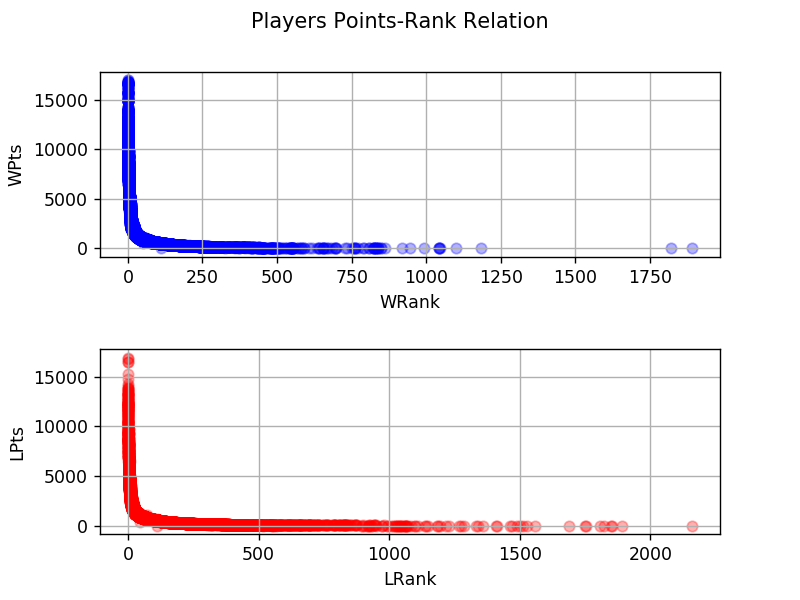

In [239]:
# RAPPORTO TRA WRank E WPts E TRA LRank e LPts

%matplotlib notebook

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
fig.suptitle('Players Points-Rank Relation')
ax[0].scatter(dataframe['WRank'], dataframe['WPts'], color = 'blue', alpha=0.3)
ax[1].scatter(dataframe['LRank'], dataframe['LPts'], color = 'red', alpha=0.3)
ax[0].set(xlabel = 'WRank', ylabel = 'WPts')
ax[1].set(xlabel = 'LRank', ylabel = 'LPts')
ax[0].grid()
ax[1].grid()
fig.subplots_adjust(hspace = 0.5)
fig.show()

<IPython.core.display.Javascript object>


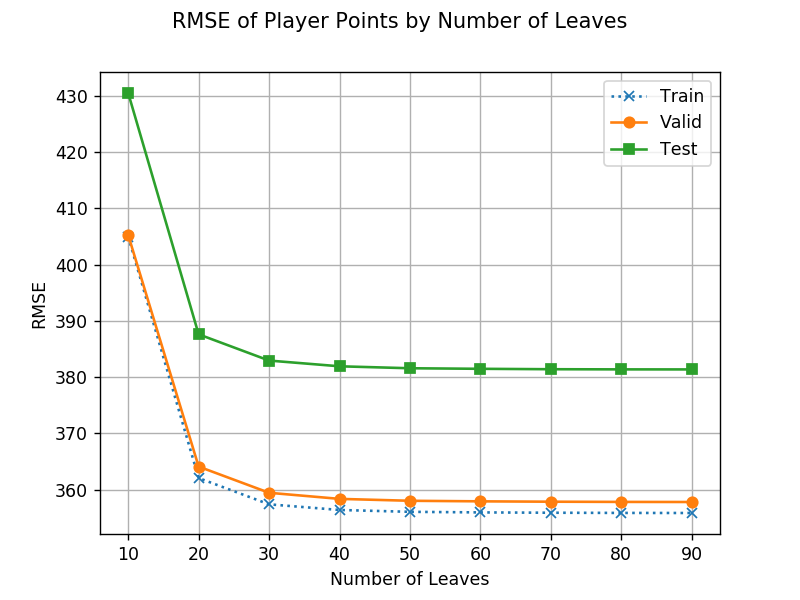

[[ 10.         404.99698069 405.27424911 430.50622149]
 [ 20.         362.0790673  364.11513444 387.62143883]
 [ 30.         357.40744951 359.4603481  382.95597223]
 [ 40.         356.40437169 358.37668249 381.93870659]
 [ 50.         356.07655175 358.03846362 381.59055799]
 [ 60.         355.97193897 357.93933292 381.49149136]
 [ 70.         355.91402141 357.87412366 381.41806896]
 [ 80.         355.88029613 357.83700973 381.39087453]
 [ 90.         355.86683106 357.82061336 381.38163782]]
[[10.0, 0.20075143551521046, 0.20464902731315265, 0.21397765644766673], [20.0, 0.17947761587426603, 0.18386514380330274, 0.19266231921795843], [30.0, 0.17716195915814267, 0.18151464288170893, 0.1903434082238523], [40.0, 0.17666474727282494, 0.18096743043467464, 0.1898377892419531], [50.0, 0.1765022514389652, 0.18079664198166717, 0.18966474639507414], [60.0, 0.17645039631810233, 0.18074658451353243, 0.1896155065878512], [70.0, 0.17642168738066677, 0.180713656167374, 0.18957901291304355], [80.0, 0.176

In [193]:
%matplotlib notebook

import matplotlib.pyplot as plt
import math, statistics

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                              l_min=10, l_max=100, l_step=10):

    errors = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_err =  math.sqrt(mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train)))
        valid_err =  math.sqrt(mean_squared_error(y_true=y_valid, y_pred=dt.predict(X_valid)))
        test_err  =  math.sqrt(mean_squared_error(y_true=y_test, y_pred=dt.predict(X_test)))

        errors += [ [max_leaves, train_err, valid_err, test_err] ]

    errors = np.array(errors)
    
    return errors

from sklearn.model_selection import train_test_split
X = dataframe[dataframe['WPts'].notna()]['WRank'].append(dataframe[dataframe['LPts'].notna()]['LRank'])
y = dataframe[dataframe['WPts'].notna()]['WPts'].append(dataframe[dataframe['LPts'].notna()]['LPts'])

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

X_train_0, X_test, y_train_0, y_test = train_test_split( X, y, 
                                                         test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_0, y_train_0, 
                                                         test_size=0.25)


errors = accuracies_vary_max_leaves(X_train, X_valid, X_test, 
                           y_train, y_valid, y_test)

fig, ax = plt.subplots()
fig.suptitle('RMSE of Player Points by Number of Leaves')
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Valid")
ax.plot(errors[:,0], errors[:,3], "s-", label="Test")
ax.set_ylabel("RMSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend()
fig.show()
print (errors)
#NRMSE
print([[errors[i,0], 
       np.divide(errors[i,1],statistics.stdev(y_train.T[0])), 
       np.divide(errors[i,2],statistics.stdev(y_valid.T[0])),
       np.divide(errors[i,3],statistics.stdev(y_test.T[0]))] 
       for i in range(0,len(errors[:,0]))])

In [240]:
# Scelgo 30 foglie dove il MSE è abbastanza basso e train e validation si somigliano (NO UNDER O OVERFITTING)
dt = DecisionTreeRegressor(max_leaf_nodes = 30)
dt.fit(X_train,y_train)

printNan()
print(dataframe[dataframe['WPts'].isna()]['WRank'])

dataframe['WPts'] = dataframe['WPts'].fillna((dt.predict(dataframe[dataframe['WPts'].isna()]['WRank'].values.reshape(-1,1))).T[0])
printNan()


printNan()
print(dataframe['LPts'].head())
print(dataframe[dataframe['LPts'].isna()]['WRank'])

dataframe['LPts'] = dataframe['LPts'].fillna((dt.predict(dataframe[dataframe['LPts'].isna()]['LRank'].values.reshape(-1,1))).T[0])
printNan()
print(dataframe['LPts'].head())

W1 :  166 / 26276
L1 :  164 / 26276
W2 :  419 / 26276
L2 :  419 / 26276
W3 :  13912 / 26276
L3 :  13912 / 26276
W4 :  23832 / 26276
L4 :  23832 / 26276
W5 :  25359 / 26276
L5 :  25359 / 26276
Wsets :  167 / 26276
Lsets :  169 / 26276
WPts :  7 / 26276
LPts :  33 / 26276
10156     53.682288
13996     76.630444
14016     65.083546
14550    147.804293
23730     95.953704
23747     96.033820
23751     96.111933
Name: WRank, dtype: float64
W1 :  166 / 26276
L1 :  164 / 26276
W2 :  419 / 26276
L2 :  419 / 26276
W3 :  13912 / 26276
L3 :  13912 / 26276
W4 :  23832 / 26276
L4 :  23832 / 26276
W5 :  25359 / 26276
L5 :  25359 / 26276
Wsets :  167 / 26276
Lsets :  169 / 26276
LPts :  33 / 26276
W1 :  166 / 26276
L1 :  164 / 26276
W2 :  419 / 26276
L2 :  419 / 26276
W3 :  13912 / 26276
L3 :  13912 / 26276
W4 :  23832 / 26276
L4 :  23832 / 26276
W5 :  25359 / 26276
L5 :  25359 / 26276
Wsets :  167 / 26276
Lsets :  169 / 26276
LPts :  33 / 26276
0     568.0
1     667.0
2     587.0
3    1102.0
4     6

In [241]:
printNan()

# Vediamo il commento alle partite in cui Wsets e Lsets è = null o è 0

print ('Vediamo il commento alle partite in cui Wsets e Lsets è = null o è 0\n')

noWsetsDf = dataframe[dataframe['Wsets'].isna()].append(dataframe[dataframe['Wsets'] == 0]).drop_duplicates()
noLsetsDf = dataframe[dataframe['Lsets'].isna()]

print(noWsetsDf['Comment'].unique())
print(noLsetsDf['Comment'].unique())

# Controlliamo solo i casi in cui la partita è stata completata

print ('\nControlliamo solo i casi in cui la partita è stata completata\n')

print(noWsetsDf[noWsetsDf['Comment'] == 'Completed'][['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5','Wsets','Lsets', 'Best of']])

# Droppo le righe incomplete
print('\nDroppo le righe incomplete\n')

print(dataframe.shape)

dataframe.drop(noWsetsDf[noWsetsDf['Comment'] == 'Completed'].index.values, axis = 0, inplace = True)

print(dataframe.shape)

# Vediamo il commento alle partite in cui W1 o L1 è = null

print('\nVediamo il commento alle partite in cui W1 o L1 è = null\n')

noW1Df = dataframe[dataframe['W1'].isna()]
noL1Df = dataframe[dataframe['L1'].isna()]

print(noW1Df['Comment'].unique())
print(noL1Df['Comment'].unique())

# Non sono presenti partite incomplete, quindi possiamo tenerle

print('\nNon sono presenti partite incomplete, quindi possiamo tenerle\n')

# Vediamo il commento alle partite in cui W2 o L2 è = null

print('\nVediamo il commento alle partite in cui W2 o L2 è = null\n')

noW2Df = dataframe[dataframe['W2'].isna()]
noL2Df = dataframe[dataframe['L2'].isna()]

print(noW2Df['Comment'].unique())
print(noL2Df['Comment'].unique())


# Controlliamo solo i casi in cui la partita è stata completata


print ('\nControlliamo solo i casi in cui la partita è stata completata\n')

no2Df = noW2Df.append(noL2Df).drop_duplicates()

print(no2Df[no2Df['Comment'] == 'Completed'][['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5','Wsets','Lsets', 'Best of']])
# Posso pure droppare la riga a cui mancano i dati

print('\nDroppo le righe incomplete\n')

print(dataframe.shape)

dataframe.drop(no2Df[no2Df['Comment'] == 'Completed'].index.values, axis = 0, inplace = True)

print(dataframe.shape)

# Vediamo il commento alle partite in cui W3 o L3 è = null solo nei casi delle partite al meglio di 5

print('\nVediamo il commento alle partite in cui W3 o L3 è = null solo nei casi delle partite al meglio di 5\n')

noW3Df = dataframe[dataframe['W3'].isna()].merge(dataframe[dataframe['Best of'] == 5])
noL3Df = dataframe[dataframe['L3'].isna()].merge(dataframe[dataframe['Best of'] == 5])

print(noW3Df['Comment'].unique())
print(noL3Df['Comment'].unique())

print('\nNon sono presenti partite incomplete, quindi possiamo tenerle\n')

W1 :  166 / 26276
L1 :  164 / 26276
W2 :  419 / 26276
L2 :  419 / 26276
W3 :  13912 / 26276
L3 :  13912 / 26276
W4 :  23832 / 26276
L4 :  23832 / 26276
W5 :  25359 / 26276
L5 :  25359 / 26276
Wsets :  167 / 26276
Lsets :  169 / 26276
Vediamo il commento alle partite in cui Wsets e Lsets è = null o è 0

['Walkover' 'Retired' 'Disqualified' 'Completed']
['Walkover' 'Retired']

Controlliamo solo i casi in cui la partita è stata completata

        W1   W2  W3  W4  W5   L1   L2  L3  L4  L5  Wsets  Lsets  Best of
9642   6.0  7.0 NaN NaN NaN  3.0  6.0 NaN NaN NaN    0.0    0.0        3
14674  1.0  NaN NaN NaN NaN  2.0  NaN NaN NaN NaN    0.0    0.0        3
25873  6.0  3.0 NaN NaN NaN  7.0  4.0 NaN NaN NaN    0.0    1.0        3

Droppo le righe incomplete

(26276, 34)
(26273, 34)

Vediamo il commento alle partite in cui W1 o L1 è = null

['Walkover' 'Retired']
['Walkover' 'Retired']

Non sono presenti partite incomplete, quindi possiamo tenerle


Vediamo il commento alle partite in cui W2 o

In [242]:
dataframe.loc[:,'W1':'Lsets'] = dataframe.loc[:,'W1':'Lsets'].fillna(0)

printNan()

dataframe.head()[['W1','W2','W3','W4','W5','L1','L2','L3','L4','L5','Wsets','Lsets']]

,W1,W2,W3,W4,W5,L1,L2,L3,L4,L5,Wsets,Lsets
0,6.0,4.0,6.0,0.0,0.0,3.0,6.0,4.0,0.0,0.0,2.0,1.0
1,6.0,7.0,0.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,2.0,0.0
2,6.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0
3,6.0,6.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,2.0,0.0
4,6.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0


In [243]:
print(dataframe.dtypes[dataframe.dtypes == object])

for value in dataframe.dtypes[dataframe.dtypes == object].index.values:
    print('\n', value, 'values length: ', len(dataframe[value].unique()))
    print('\t', dataframe[value].unique()[:20])

Location      object
Tournament    object
Series        object
Court         object
Surface       object
Round         object
Winner        object
Loser         object
Comment       object
dtype: object

 Location values length:  89
	 ['Brisbane' 'Chennai' 'Doha' 'Auckland' 'Sydney' 'Melbourne'
 'Johannesburg ' 'Santiago' 'Zagreb' 'Costa Do Sauipe' 'Rotterdam'
 'San Jose' 'Buenos Aires' 'Marseille' 'Memphis' 'Acapulco' 'Delray Beach'
 'Dubai ' 'Indian Wells' 'Miami']

 Tournament values length:  124
	 ['Brisbane International' 'Chennai Open' 'Qatar Exxon Mobil Open'
 'Heineken Open' 'Medibank International' 'Australian Open'
 'SA Tennis Open' 'Movistar Open' 'PBZ Zagreb Indoors' 'Brasil Open'
 'ABN AMRO World Tennis Tournament' 'SAP Open' 'Copa Telmex' 'Open 13'
 'Regions Morgan Keegan Championships' 'Abierto Mexicano'
 'International Championships' 'Dubai Tennis Championships'
 'BNP Paribas Open' 'Sony Ericsson Open']

 Series values length:  5
	 ['ATP250' 'Grand Slam' 'ATP500' 'Maste

In [249]:
# Con lo one-hot-encoding aggusto le categoriali di piccole dimensioni
dataframe = pandas.get_dummies(dataframe, prefix = ['Court', 'Surface', 'Comment'],
                   prefix_sep = ' ', columns = ['Court', 'Surface', 'Comment'])

dataframe.head(10).T

,0,1,2,3,4,5,6,7,8,9
ATP,1,1,1,1,1,1,1,1,1,1
Location,Brisbane,Brisbane,Brisbane,Brisbane,Brisbane,Brisbane,Brisbane,Brisbane,Brisbane,Brisbane
Tournament,Brisbane International,Brisbane International,Brisbane International,Brisbane International,Brisbane International,Brisbane International,Brisbane International,Brisbane International,Brisbane International,Brisbane International
Date,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,2010-01-05 00:00:00,2010-01-05 00:00:00
Series,ATP250,ATP250,ATP250,ATP250,ATP250,ATP250,ATP250,ATP250,ATP250,ATP250
Round,1st Round,1st Round,1st Round,1st Round,1st Round,1st Round,1st Round,1st Round,1st Round,1st Round
Best of,3,3,3,3,3,3,3,3,3,3
Winner,Gasquet R.,Odesnik W.,Gicquel M.,Falla A.,Levy H.,Bellucci T.,Stepanek R.,Roddick A.,Dolgopolov O.,Berdych T.
Loser,Nieminen J.,Clement A.,Petzschner P.,Chardy J.,Llodra M.,Chela J.I.,Millman J.,Luczak P.,Tomic B.,Lindahl N.
WRank,52,105,58,81,119,36,12,7,131,20


In [83]:
dataframe.drop(['WRank', 'WPts', 'LRank', 'LPts'], axis=1, inplace=True)


In [97]:
# odds table

data = np.concatenate((dataframe[['Tournament', 'Date', 'Winner', 'MaxW', 'AvgW']].values, 
                       dataframe[['Tournament', 'Date', 'Loser', 'MaxL', 'AvgL']].values))

odds_dataframe = pandas.DataFrame({'Tournament': data[:,0], 'Date': data[:,1], 'Player': data[:,2], 
                                   'MaxBet': data[:,3], 'AvgBet': data[:,4]}).drop_duplicates()
print(odds_dataframe.head())

           Tournament       Date     Player MaxBet  AvgBet
0  AAPT Championships 2001-01-01    Haas T.   1.12    1.11
1  AAPT Championships 2001-01-01  Hewitt L.   1.28     1.2
2  AAPT Championships 2001-01-01    Haas T.   1.35  1.2825
3  AAPT Championships 2001-01-01  Hewitt L.   1.13    1.13
4  AAPT Championships 2001-01-01   Massu N.    2.7  2.4075


In [98]:
dataframe.drop(['MaxW','MaxL','AvgW','AvgL'], axis=1, inplace=True)

In [100]:
dataframe.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'W1', 'L1', 'W2', 'L2', 'W3',
       'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets', 'Comment'],
      dtype='object')

In [19]:
dataframe.columns
# Semplifico togliendo tornei inutili fatti poco
# Faccio dal 2006






# Creare Tabella Giocatori con info su Vittorie x superficie; vittorie x Court; set vinti in totale; set persi in totale;
# Round1 vinti, Round2 vinti, semifinali ecc...

# Questo x similarità









Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [9]:
# Let's give an int value to players based on their rankings

winners = dataframe['Winner'].value_counts().subtract(dataframe['Loser'].value_counts(), fill_value = 0).sort_values(ascending = True)

players = winners.index.tolist()

dataframe['WinnerInt'] = [players.index(w) for w in dataframe['Winner']]
dataframe['LoserInt'] = [players.index(l) for l in dataframe['Loser']]




In [10]:
#Let's give int values to the other string values

def createMaps(string_list):
    dictionary = {}
    for s in string_list:
        dictionary[s]=[x for x in dataframe[s].unique()]
    return dictionary

maps = createMaps(['Location', 'Tournament', 'Series', 'Court', 'Surface', 'Round', 'Comment'])

In [11]:
def changeColumns(dictionary):
    for k,v in dictionary.items():
        dataframe[k] = [v.index(c) for c in dataframe[k]]
        
changeColumns(maps)

print(dataframe.head())

      ATP  Location  Tournament       Date  Series  Court  Surface  Round  \
2965    1         0           0 2001-01-01       0      0        0      0   
2967    1         0           0 2001-01-01       0      0        0      0   
2979    1         0           0 2001-01-01       0      0        0      1   
2981    1         0           0 2001-01-01       0      0        0      1   
2985    1         0           0 2001-01-01       0      0        0      1   

      Best of     Winner  ... Lsets  Comment  WPts  LPts  MaxW  MaxL    AvgW  \
2965        3    Haas T.  ...   0.0        0   NaN   NaN  1.12  4.00  1.1100   
2967        3  Hewitt L.  ...   0.0        0   NaN   NaN  1.28  3.80  1.2000   
2979        3    Haas T.  ...   0.0        0   NaN   NaN  1.35  3.20  1.2825   
2981        3  Hewitt L.  ...   1.0        0   NaN   NaN  1.13  5.50  1.1300   
2985        3   Massu N.  ...   0.0        0   NaN   NaN  2.70  1.45  2.4075   

       AvgL  WinnerInt  LoserInt  
2965  3.750       134

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# this is a 60/20/20 split
X_train_80, X_test, y_train_80, y_test = train_test_split(dataframe[['WinnerInt', 'LoserInt', 'WRank', 'LRank', 'Wsets', 'Lsets', 'L1', 
                                                                     'W1', 'L2', 'W2','MaxW', 'MaxL', 'AvgW', 'AvgL', 'Location',
                                                                     'Tournament', 'Series', 'Court', 'Surface', 'Round', 'Comment']], 
                                                          dataframe['WinnerInt'], 
                                                          test_size=0.20, 
                                                          random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size=0.25, random_state=42)

accuracies = []

for max_leaves in range(2,10):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f}".format(
        max_leaves,  train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

# here we are using both training and validation,
# to exploit the most data
dt = tree.DecisionTreeClassifier(max_leaf_nodes=best_max_leaves)
dt.fit(X_train_80,y_train_80)

test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print ("Test Accuracy: {:.3f}".format(test_acc) )

Leaves:  2 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Leaves:  3 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Leaves:  4 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Leaves:  5 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Leaves:  6 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Leaves:  7 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Leaves:  8 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Leaves:  9 - Train Accuracy: 1.000 - Validation Accuracy: 1.000
Best Max Leaves 9
Test Accuracy: 1.000


In [38]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from sklearn import neighbors
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dataframe[['WinnerInt', 'LoserInt', 'MaxW', 'MaxL', 'AvgW', 'AvgL']], 
                                                    dataframe['WinnerInt'], 
                                                    test_size=0.33, random_state=42)

scaler = MinMaxScaler()
imp = SimpleImputer(np.nan)
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)
scaler.fit(X_train)

for k in range(200,230):
    

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(scaler.transform(X_train),y_train)

    y_pred = kNN.predict(scaler.transform(X_test))

    # compute Accuracy
    print ("k:", k," | Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )

k: 200  | Accuracy: 0.09565992865636147
k: 201  | Accuracy: 0.0955410225921522
k: 202  | Accuracy: 0.09619500594530321
k: 203  | Accuracy: 0.09565992865636147
k: 204  | Accuracy: 0.09530321046373365
k: 205  | Accuracy: 0.09482758620689655
k: 206  | Accuracy: 0.09464922711058264
k: 207  | Accuracy: 0.09488703923900119
k: 208  | Accuracy: 0.09435196195005946
k: 209  | Accuracy: 0.0941141498216409
k: 210  | Accuracy: 0.0936385255648038
k: 211  | Accuracy: 0.0931629013079667
k: 212  | Accuracy: 0.0934601664684899
k: 213  | Accuracy: 0.0936385255648038
k: 214  | Accuracy: 0.09399524375743162
k: 215  | Accuracy: 0.0936385255648038
k: 216  | Accuracy: 0.09375743162901308
k: 217  | Accuracy: 0.09399524375743162
k: 218  | Accuracy: 0.09381688466111772
k: 219  | Accuracy: 0.09387633769322236
k: 220  | Accuracy: 0.09351961950059454
k: 221  | Accuracy: 0.09310344827586207
k: 222  | Accuracy: 0.09244946492271106
k: 223  | Accuracy: 0.09268727705112961
k: 224  | Accuracy: 0.09310344827586207
k: 225 